## Import all packages

In [1]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt

sys.path.append('../../')
from utils import microarray_utils, clustering_utils, bokeh_ui_utils

In [2]:
full_filtered_df = pd.read_csv('../microarray_probe_alignment_and_filtering/allgood_filt_agg_tidy_2021aligned_qc_rma_expression_full.csv')
full_filtered_df = full_filtered_df.rename(columns={'Unnamed: 0': 'TTHERM_ID'})
num_genes = full_filtered_df.shape[0]
num_genes

19152

In [3]:
full_filtered_df

,TTHERM_ID,Ll_GSM283687,Ll_GSM284355,Ll_GSM284362,Lm_GSM283690,Lm_GSM284357,Lm_GSM284363,Lh_GSM283691,Lh_GSM284360,Lh_GSM284364,...,C12_GSM656237,C14_GSM285580,C14_GSM285593,C14_GSM656238,C16_GSM285582,C16_GSM285595,C16_GSM656239,C18_GSM285583,C18_GSM285596,C18_GSM656240
0,TTHERM_000000042,6.929887,7.255868,6.916174,6.715306,6.934183,7.132601,6.113934,6.851876,6.617492,...,6.434607,8.029723,7.784409,7.036844,6.514294,6.905879,6.063465,7.015299,6.750550,5.837288
1,TTHERM_000000045,11.412065,12.132776,11.426402,11.540755,12.377204,11.601634,11.906195,12.383503,12.235187,...,12.794684,13.039492,12.958584,12.510169,12.959039,12.797679,12.518270,13.150140,12.926266,12.422960
2,TTHERM_00000020,4.704644,4.634241,4.959335,6.888916,5.066543,4.725164,8.461461,4.524334,4.909326,...,5.240479,4.969900,5.720181,5.249198,5.193729,7.066370,5.258043,5.043816,5.470824,5.034808
3,TTHERM_00000040,9.569498,8.032469,8.282929,10.532498,8.271665,8.843880,11.629500,8.192170,8.630466,...,7.962142,8.421054,8.060564,8.131377,8.652704,8.484806,8.224200,8.517580,8.752712,8.818705
4,TTHERM_000001189,8.778573,9.500909,9.124692,8.649560,9.447717,9.313091,8.163084,9.789106,9.585898,...,9.699965,12.446735,11.814601,12.567039,11.384517,11.178511,12.524982,9.599916,10.194289,11.670879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,YF00038369.t1,6.857246,7.585658,6.926808,7.159958,7.379645,7.388601,7.028120,7.222672,7.126856,...,7.276741,6.631553,6.646453,7.385199,7.090090,6.857970,7.747418,6.893792,6.979300,7.476262
19148,YF00038374.t1,8.211831,8.737391,8.199090,9.209613,8.314833,8.794772,9.453073,8.689157,8.547425,...,10.403435,10.436411,10.207666,11.107135,9.765590,10.310579,9.755502,9.397164,10.353490,10.371144
19149,YF00038376.t1,6.299673,7.739830,6.906786,6.771473,7.031683,6.861101,7.750896,7.765508,7.275954,...,5.627632,6.973269,7.015752,5.926255,7.289689,7.166236,6.480323,7.474055,8.106916,6.342419
19150,YF00038377.t1,5.037861,5.205597,5.149139,5.269116,5.112030,5.155678,5.772467,4.890137,4.834001,...,4.905057,4.913738,4.655880,5.063498,4.889071,4.747743,5.371899,4.619045,4.315400,5.431138


In [4]:
full_filtered_df.sample(10)

,TTHERM_ID,Ll_GSM283687,Ll_GSM284355,Ll_GSM284362,Lm_GSM283690,Lm_GSM284357,Lm_GSM284363,Lh_GSM283691,Lh_GSM284360,Lh_GSM284364,...,C12_GSM656237,C14_GSM285580,C14_GSM285593,C14_GSM656238,C16_GSM285582,C16_GSM285595,C16_GSM656239,C18_GSM285583,C18_GSM285596,C18_GSM656240
12284,TTHERM_00899470,10.156378,11.019623,10.120376,10.124985,10.971012,10.175604,9.615397,10.320713,9.618542,...,10.445304,10.449279,10.357070,10.493730,10.169338,10.029468,10.495820,10.165706,10.171662,10.252942
5772,TTHERM_00321670,9.607091,9.684685,9.473654,9.560196,9.507173,9.832900,9.793228,9.859907,9.759169,...,8.914075,9.017377,8.808124,9.443986,9.550245,9.432622,10.539719,9.611527,9.727115,10.514532
1338,TTHERM_00049110,10.160829,10.355757,10.018039,10.913567,10.750984,10.689251,10.275511,11.349408,10.946480,...,11.151702,11.041880,10.683420,10.939373,10.581343,10.570285,10.995507,10.313203,10.555215,10.883595
6576,TTHERM_00389990,9.910819,9.794994,10.116064,10.040289,9.950945,10.059891,10.151233,10.031042,10.321817,...,10.423474,10.676004,10.853689,10.568537,10.974432,10.994338,10.727532,11.360460,11.245585,10.803456
1606,TTHERM_000581919,5.086843,4.970177,4.615230,5.344114,4.947476,5.208700,5.413059,4.199989,5.039924,...,6.714689,5.478420,5.920649,6.164402,4.904571,7.310254,6.781292,6.388599,6.393111,6.447482
2033,TTHERM_000770769,6.935387,6.887255,4.752469,6.666614,5.972811,5.689887,5.239888,6.565984,6.681451,...,4.823538,5.226726,4.923428,5.006066,4.757055,5.624453,4.611073,5.631045,6.035149,4.674398
6541,TTHERM_00388430,8.308395,9.144745,8.187000,7.394624,8.728885,8.857993,7.424572,9.511344,8.795967,...,7.187501,8.958030,8.443580,7.245467,8.632699,8.398949,8.088743,7.540422,7.410219,8.974524
18952,YF00037371.t1,8.057401,8.573797,7.782311,7.859050,8.698713,8.136119,9.338764,7.442557,7.450651,...,6.712143,6.817934,6.567952,6.516930,7.464176,6.098834,7.984408,8.527654,6.120381,8.402456
1605,TTHERM_000581869,4.983176,5.359655,5.097263,5.321963,5.701678,5.246283,5.180772,6.206431,5.463087,...,6.147807,6.666165,6.267737,6.101925,6.515026,6.210924,7.749391,6.051411,5.382438,7.689330
2407,TTHERM_000933399,5.365267,7.049767,6.271000,5.008435,6.452944,6.517447,5.061598,6.627312,5.201397,...,5.991741,6.258103,5.823104,6.050181,6.327444,5.359461,5.813793,5.022180,5.610748,5.401513


In [5]:
full_filtered_norm_df = microarray_utils.normalize_expression_per_gene(full_filtered_df)

In [6]:
full_filtered_df

,TTHERM_ID,Ll_GSM283687,Ll_GSM284355,Ll_GSM284362,Lm_GSM283690,Lm_GSM284357,Lm_GSM284363,Lh_GSM283691,Lh_GSM284360,Lh_GSM284364,...,C12_GSM656237,C14_GSM285580,C14_GSM285593,C14_GSM656238,C16_GSM285582,C16_GSM285595,C16_GSM656239,C18_GSM285583,C18_GSM285596,C18_GSM656240
0,TTHERM_000000042,6.929887,7.255868,6.916174,6.715306,6.934183,7.132601,6.113934,6.851876,6.617492,...,6.434607,8.029723,7.784409,7.036844,6.514294,6.905879,6.063465,7.015299,6.750550,5.837288
1,TTHERM_000000045,11.412065,12.132776,11.426402,11.540755,12.377204,11.601634,11.906195,12.383503,12.235187,...,12.794684,13.039492,12.958584,12.510169,12.959039,12.797679,12.518270,13.150140,12.926266,12.422960
2,TTHERM_00000020,4.704644,4.634241,4.959335,6.888916,5.066543,4.725164,8.461461,4.524334,4.909326,...,5.240479,4.969900,5.720181,5.249198,5.193729,7.066370,5.258043,5.043816,5.470824,5.034808
3,TTHERM_00000040,9.569498,8.032469,8.282929,10.532498,8.271665,8.843880,11.629500,8.192170,8.630466,...,7.962142,8.421054,8.060564,8.131377,8.652704,8.484806,8.224200,8.517580,8.752712,8.818705
4,TTHERM_000001189,8.778573,9.500909,9.124692,8.649560,9.447717,9.313091,8.163084,9.789106,9.585898,...,9.699965,12.446735,11.814601,12.567039,11.384517,11.178511,12.524982,9.599916,10.194289,11.670879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,YF00038369.t1,6.857246,7.585658,6.926808,7.159958,7.379645,7.388601,7.028120,7.222672,7.126856,...,7.276741,6.631553,6.646453,7.385199,7.090090,6.857970,7.747418,6.893792,6.979300,7.476262
19148,YF00038374.t1,8.211831,8.737391,8.199090,9.209613,8.314833,8.794772,9.453073,8.689157,8.547425,...,10.403435,10.436411,10.207666,11.107135,9.765590,10.310579,9.755502,9.397164,10.353490,10.371144
19149,YF00038376.t1,6.299673,7.739830,6.906786,6.771473,7.031683,6.861101,7.750896,7.765508,7.275954,...,5.627632,6.973269,7.015752,5.926255,7.289689,7.166236,6.480323,7.474055,8.106916,6.342419
19150,YF00038377.t1,5.037861,5.205597,5.149139,5.269116,5.112030,5.155678,5.772467,4.890137,4.834001,...,4.905057,4.913738,4.655880,5.063498,4.889071,4.747743,5.371899,4.619045,4.315400,5.431138


In [7]:
list_first_3_veg_phases = [
            #  'Ll', 
            #  'Lm', 
            #  'Lh', 
             'S0', 
             'S3', 
             'S6', 
            #  'S9', 
            #  # 'S12', 
            #  'S15', 
            #  'S24'
             ]

In [8]:
first_3_veg_phases_cols = [col for col in list(full_filtered_df.columns) if col.split('_')[0] in list_first_3_veg_phases]
first_3_veg_phases_cols

['S0_GSM285363',
 'S0_GSM285554',
 'S0_GSM285561',
 'S3_GSM285542',
 'S3_GSM285555',
 'S3_GSM285562',
 'S6_GSM285543',
 'S6_GSM285556',
 'S6_GSM285563']

In [9]:
((full_filtered_df[['TTHERM_ID']+first_3_veg_phases_cols])[(full_filtered_df[first_3_veg_phases_cols].sum(axis=1) < 30)]).shape

(0, 10)

In [10]:
gene_list_test = ['TTHERM_000013409', 'TTHERM_01321550', 'TTHERM_00011710', 'TTHERM_00321680', 'TTHERM_00355700', 'TTHERM_00938950', 'TTHERM_01372820', 'TTHERM_00013410', 'TTHERM_00390080', 'TTHERM_00516380', 'TTHERM_00038880', 'TTHERM_00059370', 'TTHERM_00473020', 'TTHERM_00497590', 'TTHERM_00558350', 'TTHERM_00052190', 'TTHERM_00392790', 'TTHERM_00410180', 'TTHERM_00685980', 'TTHERM_00445920', 'TTHERM_00471040', 'TTHERM_00140780', 'TTHERM_00145480', 'TTHERM_00321720', 'TTHERM_00628650', 'TTHERM_00526730', 'TTHERM_01156770', 'TTHERM_00312200', 'TTHERM_01332070', 'TTHERM_00318900', 'TTHERM_00340180', 'TTHERM_00592740', 'TTHERM_00440600', 'TTHERM_01321570', 'TTHERM_00537380', 'TTHERM_00585170', 'TTHERM_01197130', 'TTHERM_00554390', 'TTHERM_00649180', 'TTHERM_00691410', ]


In [11]:
len(full_filtered_df['TTHERM_ID'].values)

19152

In [12]:
len(full_filtered_df['TTHERM_ID'].unique())

19152

In [13]:
[c for c in full_filtered_df.columns if c[0] != 'C']

['TTHERM_ID',
 'Ll_GSM283687',
 'Ll_GSM284355',
 'Ll_GSM284362',
 'Lm_GSM283690',
 'Lm_GSM284357',
 'Lm_GSM284363',
 'Lh_GSM283691',
 'Lh_GSM284360',
 'Lh_GSM284364',
 'S0_GSM285363',
 'S0_GSM285554',
 'S0_GSM285561',
 'S3_GSM285542',
 'S3_GSM285555',
 'S3_GSM285562',
 'S6_GSM285543',
 'S6_GSM285556',
 'S6_GSM285563',
 'S9_GSM285544',
 'S9_GSM285564',
 'S15_GSM285559',
 'S15_GSM285566',
 'S24_GSM285547',
 'S24_GSM285560']

In [14]:
full_filtered_norm_df.columns

Index(['TTHERM_ID', 'Ll_GSM283687', 'Ll_GSM284355', 'Ll_GSM284362',
       'Lm_GSM283690', 'Lm_GSM284357', 'Lm_GSM284363', 'Lh_GSM283691',
       'Lh_GSM284360', 'Lh_GSM284364', 'S0_GSM285363', 'S0_GSM285554',
       'S0_GSM285561', 'S3_GSM285542', 'S3_GSM285555', 'S3_GSM285562',
       'S6_GSM285543', 'S6_GSM285556', 'S6_GSM285563', 'S9_GSM285544',
       'S9_GSM285564', 'S15_GSM285559', 'S15_GSM285566', 'S24_GSM285547',
       'S24_GSM285560', 'C0_GSM285570', 'C0_GSM656230', 'C4_GSM285574',
       'C4_GSM285588', 'C4_GSM656234', 'C6_GSM285575', 'C6_GSM656232',
       'C8_GSM285576', 'C8_GSM285590', 'C10_GSM285578', 'C10_GSM285591',
       'C12_GSM285579', 'C12_GSM285592', 'C12_GSM656237', 'C14_GSM285580',
       'C14_GSM285593', 'C14_GSM656238', 'C16_GSM285582', 'C16_GSM285595',
       'C16_GSM656239', 'C18_GSM285583', 'C18_GSM285596', 'C18_GSM656240'],
      dtype='object')

In [15]:
full_filtered_df.head()

,TTHERM_ID,Ll_GSM283687,Ll_GSM284355,Ll_GSM284362,Lm_GSM283690,Lm_GSM284357,Lm_GSM284363,Lh_GSM283691,Lh_GSM284360,Lh_GSM284364,...,C12_GSM656237,C14_GSM285580,C14_GSM285593,C14_GSM656238,C16_GSM285582,C16_GSM285595,C16_GSM656239,C18_GSM285583,C18_GSM285596,C18_GSM656240
0,TTHERM_000000042,6.929887,7.255868,6.916174,6.715306,6.934183,7.132601,6.113934,6.851876,6.617492,...,6.434607,8.029723,7.784409,7.036844,6.514294,6.905879,6.063465,7.015299,6.750550,5.837288
1,TTHERM_000000045,11.412065,12.132776,11.426402,11.540755,12.377204,11.601634,11.906195,12.383503,12.235187,...,12.794684,13.039492,12.958584,12.510169,12.959039,12.797679,12.518270,13.150140,12.926266,12.422960
2,TTHERM_00000020,4.704644,4.634241,4.959335,6.888916,5.066543,4.725164,8.461461,4.524334,4.909326,...,5.240479,4.969900,5.720181,5.249198,5.193729,7.066370,5.258043,5.043816,5.470824,5.034808
3,TTHERM_00000040,9.569498,8.032469,8.282929,10.532498,8.271665,8.843880,11.629500,8.192170,8.630466,...,7.962142,8.421054,8.060564,8.131377,8.652704,8.484806,8.224200,8.517580,8.752712,8.818705
4,TTHERM_000001189,8.778573,9.500909,9.124692,8.649560,9.447717,9.313091,8.163084,9.789106,9.585898,...,9.699965,12.446735,11.814601,12.567039,11.384517,11.178511,12.524982,9.599916,10.194289,11.670879


In [16]:
full_filtered_norm_df.head()

,TTHERM_ID,Ll_GSM283687,Ll_GSM284355,Ll_GSM284362,Lm_GSM283690,Lm_GSM284357,Lm_GSM284363,Lh_GSM283691,Lh_GSM284360,Lh_GSM284364,...,C12_GSM656237,C14_GSM285580,C14_GSM285593,C14_GSM656238,C16_GSM285582,C16_GSM285595,C16_GSM656239,C18_GSM285583,C18_GSM285596,C18_GSM656240
0,TTHERM_000000042,0.603153,0.708360,0.598728,0.533900,0.604540,0.668577,0.339815,0.577976,0.502332,...,0.443308,0.958111,0.878939,0.637672,0.469026,0.595405,0.323527,0.630719,0.545275,0.250531
1,TTHERM_000000045,0.000000,0.366540,0.007292,0.065450,0.490852,0.096411,0.251306,0.494055,0.418625,...,0.703174,0.827679,0.786531,0.558475,0.786762,0.704697,0.562596,0.883953,0.770095,0.514123
2,TTHERM_00000020,0.051328,0.035918,0.107078,0.529448,0.130545,0.055820,0.873665,0.011860,0.096131,...,0.168618,0.109391,0.273621,0.170527,0.158385,0.568291,0.172463,0.125570,0.219039,0.123599
3,TTHERM_00000040,0.557043,0.226540,0.280396,0.764115,0.277974,0.401016,1.000000,0.260880,0.355126,...,0.211418,0.310097,0.232581,0.247808,0.359908,0.323805,0.267768,0.330852,0.381412,0.395602
4,TTHERM_000001189,0.282235,0.370588,0.324571,0.266455,0.364082,0.347615,0.206952,0.405839,0.380983,...,0.394935,0.730907,0.653587,0.745622,0.600981,0.575784,0.740477,0.382698,0.455399,0.636008


In [17]:
veg_filtered_norm_df = full_filtered_norm_df[[c for c in full_filtered_norm_df.columns if c[0] != 'C']]
sex_filtered_norm_df = full_filtered_norm_df[[c for c in full_filtered_norm_df.columns if not c[0] in ['L', 'S']]]

In [18]:
veg_mean = microarray_utils.get_geom_mean_expression(veg_filtered_norm_df)
veg_mean

,TTHERM_ID,Ll,Lm,Lh,S0,S3,S6,S9,S15,S24
0,TTHERM_000000042,0.635974,0.601393,0.469954,0.347141,0.440854,0.359722,0.536649,0.529555,0.599493
1,TTHERM_000000045,0.112396,0.203133,0.384201,0.490617,0.577707,0.683357,0.816437,0.757858,0.828386
2,TTHERM_00000020,0.064341,0.222186,0.276120,0.954234,0.534106,0.521518,0.343101,0.147739,0.205155
3,TTHERM_00000040,0.347232,0.467227,0.506241,0.620640,0.505108,0.393203,0.469252,0.571782,0.587775
4,TTHERM_000001189,0.325307,0.325354,0.328224,0.085931,0.194334,0.087428,0.113243,0.181127,0.178949
...,...,...,...,...,...,...,...,...,...,...
19147,YF00038369.t1,0.367736,0.488817,0.381286,0.769467,0.537616,0.454234,0.441439,0.400734,0.385878
19148,YF00038374.t1,0.046884,0.148824,0.181312,0.523388,0.452635,0.382931,0.421408,0.438506,0.602099
19149,YF00038376.t1,0.648828,0.629565,0.843982,0.154151,0.479962,0.514778,0.547126,0.230330,0.400878
19150,YF00038377.t1,0.295997,0.313492,0.299985,0.304867,0.178534,0.206746,0.099545,0.188599,0.063531


In [19]:
sex_mean = microarray_utils.get_geom_mean_expression(sex_filtered_norm_df)
sex_mean

,TTHERM_ID,C0,C4,C6,C8,C10,C12,C14,C16,C18
0,TTHERM_000000042,0.165965,0.720166,0.533196,0.961412,0.505781,0.694399,0.819669,0.458404,0.466087
1,TTHERM_000000045,0.955968,0.614831,0.564289,0.432529,0.749971,0.658495,0.720033,0.682107,0.715573
2,TTHERM_00000020,0.535258,0.303090,0.199726,0.171148,0.158046,0.176995,0.182593,0.286647,0.155226
3,TTHERM_00000040,0.500309,0.504203,0.556471,0.346999,0.053950,0.135662,0.263055,0.316612,0.369005
4,TTHERM_000001189,0.022357,0.981632,0.955635,0.759855,0.536163,0.530064,0.709557,0.637509,0.487641
...,...,...,...,...,...,...,...,...,...,...
19147,YF00038369.t1,0.545361,0.479928,0.747406,0.200229,0.014003,0.334214,0.225711,0.428139,0.368566
19148,YF00038374.t1,0.647559,0.973372,0.785915,0.724912,0.637046,0.638744,0.632455,0.463428,0.485659
19149,YF00038376.t1,0.480322,0.306840,0.389976,0.422348,0.039438,0.242149,0.546161,0.653791,0.742858
19150,YF00038377.t1,0.225291,0.711959,0.323804,0.154843,0.123972,0.180392,0.202705,0.246088,0.159865


Get the annnotations

In [20]:
complete_annot = pd.read_csv('../eggnog/complete_eggnog_annotation.csv')

Add the TGD annotations for all the genes to the dataframe

In [21]:
complete_annot

,TTHERM_ID,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,TGD2021_description
0,TTHERM_00444130,5911.EAS03030,0.0,1773.3,"2E3YF@1|root,2SAXT@2759|Eukaryota,3ZCCZ@5878|C...",5878|Ciliophora,-,-,-,-,...,-,-,-,-,-,-,-,-,-,RRM23 hypothetical protein
1,YF00036564.t1,5911.EAS03033,0.0,4305.4,"2CBWM@1|root,2RT0G@2759|Eukaryota,3ZFJW@5878|C...",5878|Ciliophora,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,TTHERM_00444170,5911.EAS03034,4.6999999999999985e-226,738.6,"2BF0K@1|root,2S15V@2759|Eukaryota,3ZBPB@5878|C...",5878|Ciliophora,I,2-oxoacid dehydrogenases acyltransferase (cata...,-,-,...,-,-,-,-,-,-,-,-,2-oxoacid_dh,2-oxo acid dehydrogenase acyltransferase domai...
3,TTHERM_00444180,5911.EAS03035,0.0,1065.5,"28KDA@1|root,2QSU4@2759|Eukaryota,3ZCSX@5878|C...",5878|Ciliophora,S,Radial spoke head,-,-,...,-,-,-,-,-,-,-,-,Radial_spoke,radial spokehead protein
4,TTHERM_00444190,5911.EAS03036,8.300000000000001e-303,1000.1,"COG0814@1|root,KOG1304@2759|Eukaryota,3ZF1N@58...",5878|Ciliophora,E,Transmembrane amino acid transporter protein,-,-,...,"ko04138,map04138",-,-,-,"ko00000,ko00001,ko02000,ko04131",2.A.18.8,-,-,Aa_trans,transmembrane amino acid transporter protein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25982,YF00007805.t1,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
25983,TTHERM_01260770,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,hypothetical protein
25984,YF00007807.t1,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
25985,YF00007808.t1,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [22]:
# checkout_df = complete_annot.loc[complete_annot['TTHERM_ID'].isin(checkout)]

In [23]:
# len(checkout)

In [24]:
# checkout_df.to_csv('../checkout_different_filtered_genes.csv', index=False)

In [25]:
# complete_annot.to_csv('/Users/eukarya/Downloads/tgn_complete_annot.csv', index=False)

## Round one of plotting and consensus 

First, cluster accoding to UMAP/Leiden in full-dimensional space, using Manhattan distance and setting the number of neighbors to 5

### LEIDEN CLUSTERING

In [26]:
phases = 'full'

In [27]:
# leiden_label_df_round_1, full_dists, sscore, modularity = clustering_utils.build_label_df(full_filtered_norm_df, phases, random_state=42, n_neighbors=3, leiden_type='modularity')
leiden_label_df_round_1, full_dists, sscore, modularity =  clustering_utils.build_label_df(full_filtered_norm_df, phases, random_state=42, n_neighbors=5, leiden_type='cpm', la_res_param=0.035)

In [28]:
leiden_label_df_round_1_arranged = bokeh_ui_utils.arrange_modules(full_filtered_norm_df, leiden_label_df_round_1, phases) 
leiden_label_df_round_1_arranged_sorted = leiden_label_df_round_1_arranged.sort_values(by=['label', 'TTHERM_ID'], ascending=False)

Index(['TTHERM_ID', 'Ll_GSM283687', 'Ll_GSM284355', 'Ll_GSM284362',
       'Lm_GSM283690', 'Lm_GSM284357', 'Lm_GSM284363', 'Lh_GSM283691',
       'Lh_GSM284360', 'Lh_GSM284364', 'S0_GSM285363', 'S0_GSM285554',
       'S0_GSM285561', 'S3_GSM285542', 'S3_GSM285555', 'S3_GSM285562',
       'S6_GSM285543', 'S6_GSM285556', 'S6_GSM285563', 'S9_GSM285544',
       'S9_GSM285564', 'S15_GSM285559', 'S15_GSM285566', 'S24_GSM285547',
       'S24_GSM285560', 'C0_GSM285570', 'C0_GSM656230', 'C4_GSM285574',
       'C4_GSM285588', 'C4_GSM656234', 'C6_GSM285575', 'C6_GSM656232',
       'C8_GSM285576', 'C8_GSM285590', 'C10_GSM285578', 'C10_GSM285591',
       'C12_GSM285579', 'C12_GSM285592', 'C12_GSM656237', 'C14_GSM285580',
       'C14_GSM285593', 'C14_GSM656238', 'C16_GSM285582', 'C16_GSM285595',
       'C16_GSM656239', 'C18_GSM285583', 'C18_GSM285596', 'C18_GSM656240'],
      dtype='object')
Index(['TTHERM_ID', 'label'], dtype='object')
19152


In [29]:
sscore, modularity

(0.009272374601720092, 0.5058026102818479)

In [30]:
leiden_label_df_round_1_arranged_sorted.head()

,TTHERM_ID,label
17431,YF00025448.t1,1242
17430,YF00025446.t1,1242
17429,YF00025444.t1,1242
17718,YF00027408.t1,1241
15925,YF00013735.t1,1241


In [31]:
leiden_label_df_round_1_arranged_sorted['label'].mode()

0    710
dtype: int64

In [32]:
leiden_label_df_round_1

,TTHERM_ID,label
0,TTHERM_000000042,944
1,TTHERM_000000045,336
2,TTHERM_00000020,195
3,TTHERM_00000040,620
4,TTHERM_000001189,83
...,...,...
19147,YF00038369.t1,1000
19148,YF00038374.t1,152
19149,YF00038376.t1,923
19150,YF00038377.t1,75


In [33]:
max(leiden_label_df_round_1['label'].values)

1242

In [34]:
leiden_label_df_round_1['label'].values

array([944, 336, 195, ..., 923,  75, 201])

In [35]:
# leiden_label_df_round_1, veg_dists, veg_sscore, veg_modularity = clustering_utils.build_label_df(veg_filtered_norm_df, 'veg', lldf=leiden_label_df_round_1, random_state=42, n_neighbors=3)
# leiden_label_df_round_1, sex_dists, sex_sscore, sex_modularity = clustering_utils.build_label_df(sex_filtered_norm_df, 'sex', lldf=leiden_label_df_round_1, random_state=42, n_neighbors=3)

In [36]:
leiden_label_df_round_1

,TTHERM_ID,label
0,TTHERM_000000042,944
1,TTHERM_000000045,336
2,TTHERM_00000020,195
3,TTHERM_00000040,620
4,TTHERM_000001189,83
...,...,...
19147,YF00038369.t1,1000
19148,YF00038374.t1,152
19149,YF00038376.t1,923
19150,YF00038377.t1,75


In [37]:
# max(leiden_label_df_round_1['leiden_label_veg'].values)

In [38]:
# max(leiden_label_df_round_1['leiden_label_sex'].values)

Check out how many clusters we have

In [39]:
# leiden_label_df_round_1.to_csv('../clustergrammer/leiden_label_df_round_1_nn2.csv', index=False)

In [40]:
max(leiden_label_df_round_1['label'].values)

1242

In [41]:
# max(leiden_label_df_round_1['leiden_label_veg'].values)

In [42]:
# max(leiden_label_df_round_1['leiden_label_sex'].values)

In [43]:
module_size_list = []
for l in leiden_label_df_round_1['label'].unique():
    df = leiden_label_df_round_1.loc[leiden_label_df_round_1['label'] == l]
    module_size_list.append(len(df))
    
np.mean(module_size_list)

15.407884151246984

In [44]:
np.median(module_size_list)

15.0

In [45]:
np.max(module_size_list)

48

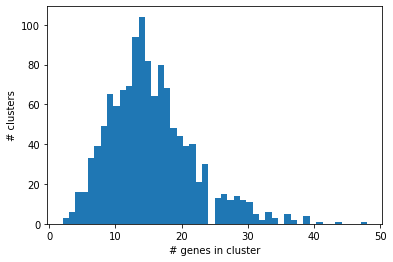

In [46]:
plt.hist(module_size_list, max(module_size_list))
plt.xlabel('# genes in cluster')
plt.ylabel('# clusters')
plt.show()

In [47]:
labeled_annot = leiden_label_df_round_1.merge(complete_annot, on='TTHERM_ID')
labeled_annot.head()

,TTHERM_ID,label,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,...,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,TGD2021_description
0,TTHERM_000000042,944,5911.EAR87740,0.0,1776.8,"2CVX5@1|root,2RT23@2759|Eukaryota,3ZDPV@5878|C...",5878|Ciliophora,-,-,-,...,-,-,-,-,-,-,-,-,-,B-box zinc finger protein
1,TTHERM_000000045,336,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,transmembrane protein putative
2,TTHERM_00000020,195,5911.EAR87739,1.5e-77,260.5,"KOG0032@1|root,KOG0032@2759|Eukaryota",2759|Eukaryota,T,protein serine/threonine kinase activity,-,...,"ko04010,ko04114,ko04136,ko04138,ko04139,ko0414...",-,-,-,"ko00000,ko00001,ko01000,ko01001,ko03019,ko0302...",-,-,-,"LRR_6,Pkinase",Serine/Threonine kinase domain protein
3,TTHERM_00000040,620,5911.EAR87740,0.0,2139.6,"2CVX5@1|root,2RT23@2759|Eukaryota,3ZDPV@5878|C...",5878|Ciliophora,-,-,-,...,-,-,-,-,-,-,-,-,-,B-box zinc finger protein
4,TTHERM_000001189,83,264951.V5FSD4,3.8e-05,15.3,"2EKHE@1|root,2SQDU@2759|Eukaryota,3A565@33154|...",4890|Ascomycota,S,BTB POZ domain-containing protein,-,...,-,-,-,-,-,-,-,-,BTB,BTB/POZ domain protein


In [48]:
leiden_label_df_round_1.loc[leiden_label_df_round_1['label']==0]

,TTHERM_ID,label
14497,YF00003346.t1,0
14501,YF00003359.t1,0
14646,YF00004063.t1,0
15207,YF00008259.t1,0
15222,YF00008319.t1,0
15229,YF00008373.t1,0
15522,YF00010381.t1,0
15540,YF00010446.t1,0
15550,YF00010475.t1,0
15707,YF00011371.t1,0


In [49]:
leiden_label_df_round_1.loc[leiden_label_df_round_1['TTHERM_ID']=='TTHERM_00532700']

,TTHERM_ID,label
8773,TTHERM_00532700,426


In [50]:
labeled_annot.loc[labeled_annot['label'] == 10][['TTHERM_ID', 'Description', 'TGD2021_description']]

,TTHERM_ID,Description,TGD2021_description
1460,TTHERM_00052260,"lactate/malate dehydrogenase, NAD binding domain",MDH3 cytoplasmic and cytosolic malate dehydrog...
1468,TTHERM_00052310,Belongs to the mitochondrial carrier (TC 2.A.2...,AAC ADP/ATP transporter on adenylate translocase
1529,TTHERM_00053800,Catalyzes the exchange of an acyl for a long-c...,peroxisomal alkyldihydroxyacetonephosphate syn...
2088,TTHERM_000777289,Vacuolar sorting protein 39 domain 2,transforming growth beta receptor associated p...
2526,TTHERM_00101470,-,hypothetical protein
2607,TTHERM_00105450,2-oxoacid dehydrogenases acyltransferase (cata...,2-oxoglutarate dehydrogenase complex protein p...
3668,TTHERM_00161250,V-ATPase subunit H,vacuolar ATP synthase subunit H
4010,TTHERM_00193640,2-oxoglutarate dehydrogenase N-terminus,oxoglutarate dehydrogenase (succinyl-transferr...
4815,TTHERM_00263310,-,transmembrane protein putative
5118,TTHERM_00289080,Pyridoxal-dependent decarboxylase conserved do...,pyridoxal-dependent decarboxylase domain protein


In [51]:
leiden_label_df_round_1_arranged_sorted.to_csv('./test_nn3_leiden_label_df_round_1.csv', index=False)

In [52]:
leiden_label_df_round_1

,TTHERM_ID,label
0,TTHERM_000000042,944
1,TTHERM_000000045,336
2,TTHERM_00000020,195
3,TTHERM_00000040,620
4,TTHERM_000001189,83
...,...,...
19147,YF00038369.t1,1000
19148,YF00038374.t1,152
19149,YF00038376.t1,923
19150,YF00038377.t1,75


In [53]:
np.sum(np.array(module_size_list) >= 5)

1218

In [54]:
leiden_label_df_round_1.loc[leiden_label_df_round_1['TTHERM_ID'] == 'TTHERM_01386050']

,TTHERM_ID,label
14059,TTHERM_01386050,4


In [55]:
# full_pymde_data = full_filtered_norm_df[list(full_filtered_norm_df.columns)[1:]].values

# pymde.seed(42)
# torch.seed(42)

# full_embedding = pymde.preserve_neighbors(
#     full_pymde_data, 
#     verbose=True,
#     n_neighbors=5,
#     constraint=pymde.Standardized()
# ).embed()

# pymde_full_df = pd.DataFrame(np.array(full_embedding), columns=('x', 'y'))
# bokeh.plotting.output_file(filename='./plots/full_norm_pymde_leiden_round_1.2.html', mode='inline')

# p = plot_embedding(full_filtered_norm_df, pymde_full_df, complete_annot, leiden_label_df_round_1, 'full', palette32, n_neighbors=5, radius=0.005)
# bokeh.plotting.save(p)

For ordering the leiden clusters in the heatmap, try computing the cityblock distance between centroids and then ordering by smallest distance, starting with largest cluster.

In [56]:
test_centroid = pd.DataFrame({'a': np.array([1, 2, 3, 4]), 'b': np.array([0, 2, 0, 2])})
test_centroid

,a,b
0,1,0
1,2,2
2,3,0
3,4,2


In [57]:
test_centroid.mean(axis=0).values

array([2.5, 1. ])

In [58]:
l = bokeh_ui_utils.get_all_module_centroids(full_filtered_norm_df, leiden_label_df_round_1)

Module 0 is always the largest for leiden and WGCNA; need to check about CLR/MCL

In [59]:
cdf = bokeh_ui_utils.get_module_centroid_df(full_filtered_norm_df, leiden_label_df_round_1)

Index(['TTHERM_ID', 'Ll_GSM283687', 'Ll_GSM284355', 'Ll_GSM284362',
       'Lm_GSM283690', 'Lm_GSM284357', 'Lm_GSM284363', 'Lh_GSM283691',
       'Lh_GSM284360', 'Lh_GSM284364', 'S0_GSM285363', 'S0_GSM285554',
       'S0_GSM285561', 'S3_GSM285542', 'S3_GSM285555', 'S3_GSM285562',
       'S6_GSM285543', 'S6_GSM285556', 'S6_GSM285563', 'S9_GSM285544',
       'S9_GSM285564', 'S15_GSM285559', 'S15_GSM285566', 'S24_GSM285547',
       'S24_GSM285560', 'C0_GSM285570', 'C0_GSM656230', 'C4_GSM285574',
       'C4_GSM285588', 'C4_GSM656234', 'C6_GSM285575', 'C6_GSM656232',
       'C8_GSM285576', 'C8_GSM285590', 'C10_GSM285578', 'C10_GSM285591',
       'C12_GSM285579', 'C12_GSM285592', 'C12_GSM656237', 'C14_GSM285580',
       'C14_GSM285593', 'C14_GSM656238', 'C16_GSM285582', 'C16_GSM285595',
       'C16_GSM656239', 'C18_GSM285583', 'C18_GSM285596', 'C18_GSM656240'],
      dtype='object')
Index(['TTHERM_ID', 'label'], dtype='object')


In [60]:
# arr_df = arrange_modules(full_filtered_norm_df, leiden_label_df_round_1, 'leiden', 'full') # FIXME
arr_df = leiden_label_df_round_1

In [61]:
bokeh_ui_utils.arrange_modules(full_filtered_df, leiden_label_df_round_1, 'full')


Index(['TTHERM_ID', 'Ll_GSM283687', 'Ll_GSM284355', 'Ll_GSM284362',
       'Lm_GSM283690', 'Lm_GSM284357', 'Lm_GSM284363', 'Lh_GSM283691',
       'Lh_GSM284360', 'Lh_GSM284364', 'S0_GSM285363', 'S0_GSM285554',
       'S0_GSM285561', 'S3_GSM285542', 'S3_GSM285555', 'S3_GSM285562',
       'S6_GSM285543', 'S6_GSM285556', 'S6_GSM285563', 'S9_GSM285544',
       'S9_GSM285564', 'S15_GSM285559', 'S15_GSM285566', 'S24_GSM285547',
       'S24_GSM285560', 'C0_GSM285570', 'C0_GSM656230', 'C4_GSM285574',
       'C4_GSM285588', 'C4_GSM656234', 'C6_GSM285575', 'C6_GSM656232',
       'C8_GSM285576', 'C8_GSM285590', 'C10_GSM285578', 'C10_GSM285591',
       'C12_GSM285579', 'C12_GSM285592', 'C12_GSM656237', 'C14_GSM285580',
       'C14_GSM285593', 'C14_GSM656238', 'C16_GSM285582', 'C16_GSM285595',
       'C16_GSM656239', 'C18_GSM285583', 'C18_GSM285596', 'C18_GSM656240'],
      dtype='object')
Index(['TTHERM_ID', 'label'], dtype='object')
19152


,TTHERM_ID,label
189,TTHERM_000086999,925
1186,TTHERM_00046700,925
1273,TTHERM_00047640,925
3354,TTHERM_00146080,925
3891,TTHERM_00189540,925
...,...,...
6795,TTHERM_00410280,398
8032,TTHERM_00486300,398
9634,TTHERM_00600700,398
9678,TTHERM_00616070,398


In [62]:
arr_df.loc[arr_df['label'] == 0]

,TTHERM_ID,label
14497,YF00003346.t1,0
14501,YF00003359.t1,0
14646,YF00004063.t1,0
15207,YF00008259.t1,0
15222,YF00008319.t1,0
15229,YF00008373.t1,0
15522,YF00010381.t1,0
15540,YF00010446.t1,0
15550,YF00010475.t1,0
15707,YF00011371.t1,0


In [63]:
arr_df.loc[arr_df['TTHERM_ID'] == 'TTHERM_01386050']

,TTHERM_ID,label
14059,TTHERM_01386050,4


In [64]:
leiden_label_df_round_1.loc[leiden_label_df_round_1['TTHERM_ID'] == 'TTHERM_01386050']

,TTHERM_ID,label
14059,TTHERM_01386050,4


In [65]:
leiden_label_df_round_1_sorted = leiden_label_df_round_1.sort_values(by='label')
leiden_label_df_round_1_sorted.head()

,TTHERM_ID,label
16327,YF00016371.t1,0
18562,YF00035286.t1,0
17880,YF00028262.t1,0
17886,YF00028283.t1,0
14646,YF00004063.t1,0


In [66]:
# for MCL
def leiden_clustering_df_to_csv(df, export_file_path):
    current_module = list(df['label'].values)[0]

    new_cluster = True

    with open(export_file_path, 'w') as f:
        for idx, row in df.iterrows():
            if current_module != row['label']:
                current_module = row['label']
                f.write('\n')
                new_cluster =True

            elif not new_cluster:
                f.write('\t')
            
            f.write(row['TTHERM_ID'])
            new_cluster = False

        f.write('\n')
    
    print(export_file_path, 'successfully exported.')

In [67]:
# leiden_clustering_df_to_csv(leiden_label_df_round_1_sorted, './leiden_clustering.labels')

# for la_param, df in leiden_label_df_cpms.items():
#     leiden_clustering_df_to_csv(df, f'./leiden_clustering_cpm_{str(la_param)}.labels')

In [68]:
# with open('./leiden_clustering.labels', 'r') as f:
#     num_leiden_clusters = f.readlines()
#     print(len(num_leiden_clusters))

# print(max(list(leiden_label_df_round_1_sorted['label'].values)) + 1) # module numbering starts at 0

In [69]:
# rcl_mcl_df.to_csv('./test_nn3_leiden_label_df_round_1_rearranged.csv')

In [70]:
# rcl_mcl_df = pd.read_csv('./mcl_rcl/mcl_rcl_label_df_round_1.csv')
# rcl_mcl_df

In [71]:
# for gene in gene_list_test:
#     print((rcl_mcl_df.loc[rcl_mcl_df['TTHERM_ID'] == gene])['label'].values[0])